I. Quelques données exploratoires sur le corpus.


A. Comparaison entre le nombre de témoins-copies et le nombre de témoins-manuscrits.

Nombre de témoins totaux par auteur:
workAuthor
Aurelius Prudentius Clemens           522
Eutropius Presbyter                    92
Paulus Orosius                         90
Potamius Episcopus Olisiponensis       79
Juvencus Presbyter                     77
Gregorius Episcopus Illiberitanus      70
Pastor episcopus  gallaeciae           63
Avitus Presbyter Bracarensis           62
Bachiarius Monachus                    60
Pacianus Episcopus Barcinonensis       51
authorship questioned                  37
Consentius                             29
Priscillianus Episcopus Abilensis      23
Montanus Episcopus Toletanus           18
Syagrius Episcopus                     11
Severus episcopus Minoricensis          7
Flavius Merobaudes                      5
Egeria?                                 5
Valerianus episcopus Calagoritanus      4
Turibius episcopus Asturicensis         3
Vincentius episcopus Oscensis           2
Agrestius Episcopus (Lucensis?)         1
Name: count, dtype: int64

N

<Figure size 1400x800 with 0 Axes>

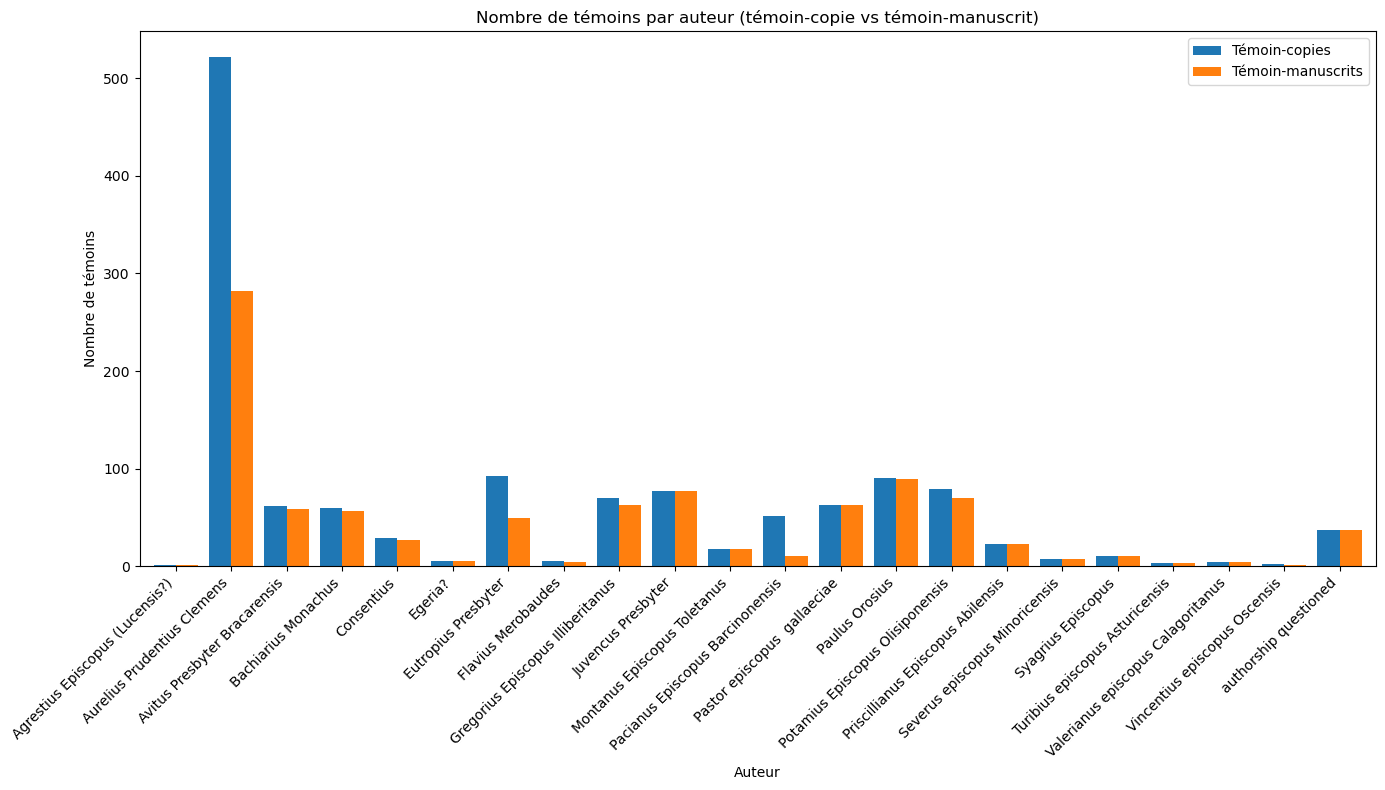

<Figure size 640x480 with 0 Axes>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "C:\\Users\\ADMIN\\Desktop\\Ecole_des_Chartes\\Memoire_2\\manuscripts_data_2\\manuscripts_data_vr\\wits_table4.xlsx" 
df = pd.read_excel(file_path)

# Je compte le nombre de témoins par auteur : j'utilise la colonne "workauthor" car le nombre d'occurrences d'un même auteur indique forcément son nombre de témoins.
witness_count_total = df['workAuthor'].value_counts()

# Je déduplique les témoins pour chaque auteur : lorsque qu'un même manuscrit apparait plusieurs fois pour le même auteur je le laisse une seule fois. 
df_unique_witnesses = df.drop_duplicates(subset=['workAuthor', 'witSignature'])

# J'ai donc le nombre de manuscrit physiques par auteur
witness_count_unique = df_unique_witnesses['workAuthor'].value_counts()

# J'ajoute mes deux résultats dans un dataframe qui servira plus tard.
combined_counts = pd.DataFrame({
    'Total Witnesses': witness_count_total,
    'Unique Witnesses': witness_count_unique
}).fillna(0)  #je remplis les valeurs manquantes par 0 au cas où pour pas qu'il y ait de problèmes

# Je vérifie les résultats ne les affichant
print("Nombre de témoins totaux par auteur:")
print(witness_count_total)
print("\nNombre de témoins uniques par auteur:")
print(witness_count_unique)

#Je les visualise
plt.figure(figsize=(14, 8))
ax = combined_counts.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.xlabel('Auteur')
plt.ylabel('Nombre de témoins')
plt.title('Nombre de témoins par auteur (témoin-copie vs témoin-manuscrit)')
plt.xticks(rotation=45, ha='right')
plt.legend(['Témoin-copies', 'Témoin-manuscrits'])
plt.tight_layout()
plt.show()
plt.savefig("graphique_temoins_physical.png")

B. Modèles de régression linéaire : le rapport entre le nombre de témoins-manuscrits (variable dépendante) et le nombre d'oeuvres d'un auteur (variable indépendante).

Coefficient de détermination (R²) pour la régression linéaire : 0.48503402548946895
Coefficient de détermination pour la régression quadratique (R²) : 0.6979347667804958
Coefficient de détermination pour la régression logarithmique (R²) : 0.2030615774324961
RMSE pour la régression linéaire : 42.36470392902858
RMSE pour la régression quadratique : 32.44630747019963
RMSE pour la régression logarithmique : 52.6067798638018


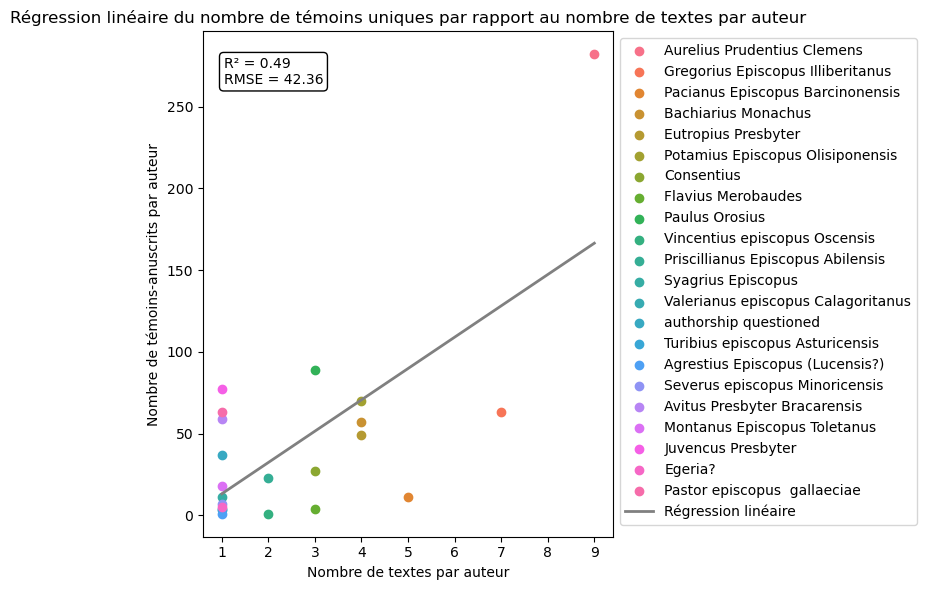

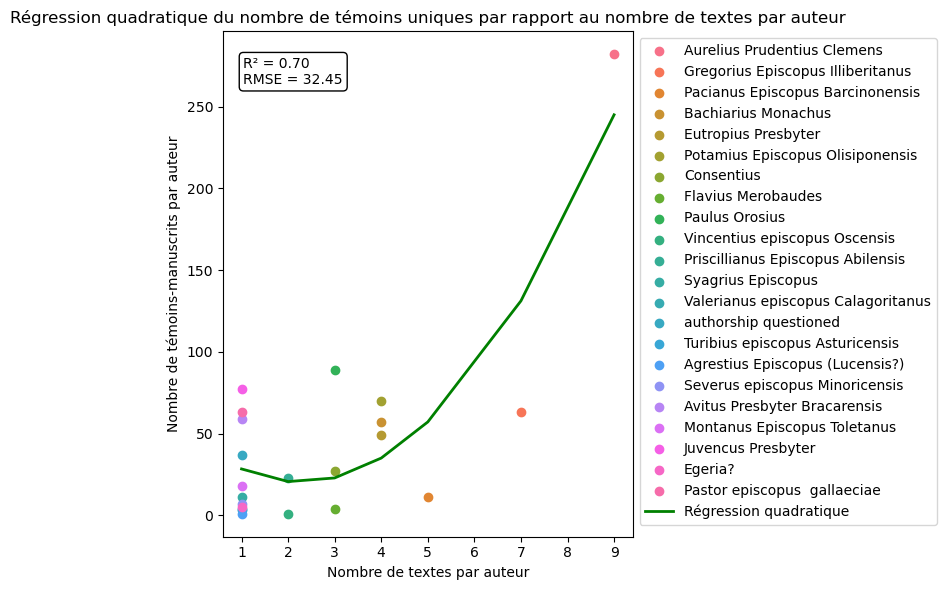

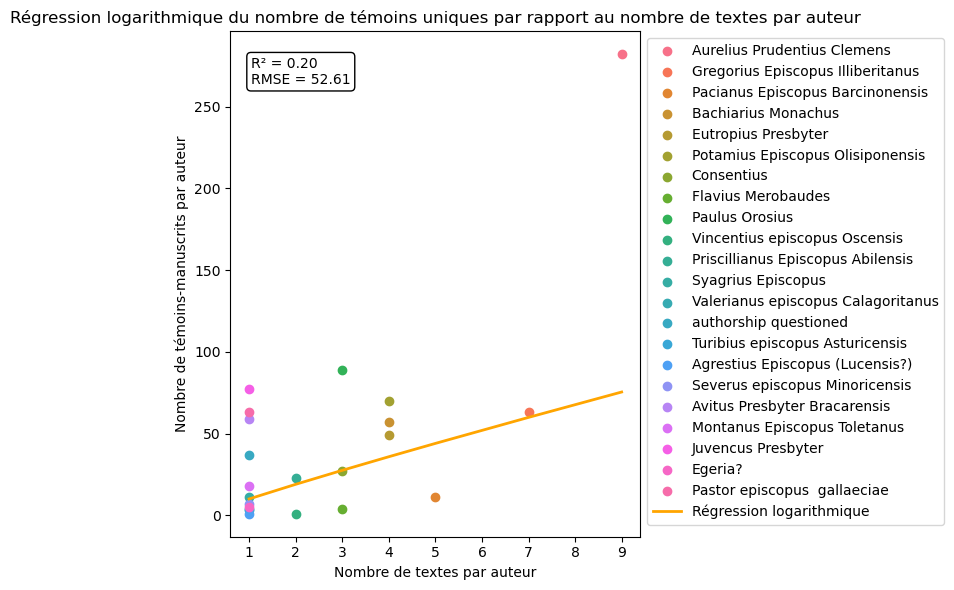

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.metrics import mean_squared_error

file_path = "C:\\Users\\ADMIN\\Desktop\\Ecole_des_Chartes\\Memoire_2\\manuscripts_data_2\\manuscripts_data_vr\\wits_table4.xlsx"
df = pd.read_excel(file_path)

#Reprise de ce qui a été fait au-dessus
df_unique_witnesses = df.drop_duplicates(subset=['workAuthor', 'witSignature'])
witness_count_unique = df_unique_witnesses['workAuthor'].value_counts()

# Je compte aussi le nombre d'oeuvres par auteur : même méthode que pour trouver le nombre de manuscrits. Je déduplique.
text_count = df[['workAuthor', 'workTitle']].drop_duplicates()['workAuthor'].value_counts()

#  Df de  trois colonnes : 'workAuthor' (auteur de l'œuvre), 'text_count' (comptage d'oeuvres) et 'witness_count_unique' (nombre de témoins-manuscrits par auteur).
data = pd.DataFrame({'workAuthor': text_count.index, 'text_count': text_count.values})

data['witness_count_unique'] = witness_count_unique.reindex(data['workAuthor']).values

# J'utilise une palette de couleurs distinctes pour chaque auteur pour que le graphique soit plus lisible
colors = sns.color_palette("husl", n_colors=len(data))

# J'y applique les différentes régressions : j'ai reçu l'aide d'un ami pour les implémenter correctement.

#Régression linéaire
X = data[['text_count']]
y = data['witness_count_unique']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print("Coefficient de détermination (R²) pour la régression linéaire :", r2)

#Régression quadratique
poly_features = PolynomialFeatures(degree=2)
X_quad = poly_features.fit_transform(X)
model_quad = LinearRegression()
model_quad.fit(X_quad, y)
y_pred_quad = model_quad.predict(X_quad)
r2_quad = r2_score(y, y_pred_quad)
print("Coefficient de détermination pour la régression quadratique (R²) :", r2_quad)

#Régression logarithmique
X_log = np.log(X)
y_log = np.log(y)
model_log = LinearRegression()
model_log.fit(X_log, y_log)
y_pred_log = model_log.predict(X_log)
r2_log = r2_score(y_log, y_pred_log)
print("Coefficient de détermination pour la régression logarithmique (R²) :", r2_log)


# Calculer le RMSE pour les régressions : cette mesure permet d'évaluer la performance de notre modèle de régression
rmse_linear = np.sqrt(mean_squared_error(y, y_pred))
rmse_quad = np.sqrt(mean_squared_error(y, y_pred_quad))
rmse_log = np.sqrt(mean_squared_error(y, np.exp(y_pred_log))) #np. exp a été rajouté car vu que les valeurs ont subi une trnaformation logarithmique, avec l'exponentielle je les transforme à nouveau en valeurs d'origine


print("RMSE pour la régression linéaire :", rmse_linear)
print("RMSE pour la régression quadratique :", rmse_quad)
print("RMSE pour la régression logarithmique :", rmse_log)

# Je visualise les ces régressions
plt.figure(figsize=(8, 6))
for i, row in data.iterrows():
    plt.scatter(row['text_count'], row['witness_count_unique'], color=colors[i], label=row['workAuthor'], marker='o')
plt.plot(X, y_pred, color='gray', linewidth=2, label='Régression linéaire')
plt.title('Régression linéaire du nombre de témoins uniques par rapport au nombre de textes par auteur')
plt.xlabel('Nombre de textes par auteur')
plt.ylabel('Nombre de témoins-anuscrits par auteur')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.annotate(f'R² = {r2:.2f}\nRMSE = {rmse_linear:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', 
             horizontalalignment='left', verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
plt.tight_layout()
plt.savefig("linear_regression.png")
plt.show()


plt.figure(figsize=(8, 6))
for i, row in data.iterrows():
    plt.scatter(row['text_count'], row['witness_count_unique'], color=colors[i], label=row['workAuthor'], marker='o')
plt.plot(X, y_pred_quad, color='green', linewidth=2, label='Régression quadratique')
plt.title('Régression quadratique du nombre de témoins uniques par rapport au nombre de textes par auteur')
plt.xlabel('Nombre de textes par auteur')
plt.ylabel('Nombre de témoins-manuscrits par auteur')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.annotate(f'R² = {r2_quad:.2f}\nRMSE = {rmse_quad:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', 
             horizontalalignment='left', verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
plt.tight_layout()
plt.savefig("quadratic_regression.png")
plt.show()


plt.figure(figsize=(8, 6))
for i, row in data.iterrows():
    plt.scatter(row['text_count'], row['witness_count_unique'], color=colors[i], label=row['workAuthor'], marker='o')
plt.plot(X, np.exp(y_pred_log), color='orange', linewidth=2, label='Régression logarithmique')
plt.title('Régression logarithmique du nombre de témoins uniques par rapport au nombre de textes par auteur')
plt.xlabel('Nombre de textes par auteur')
plt.ylabel('Nombre de témoins-manuscrits par auteur')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.annotate(f'R² = {r2_log:.2f}\nRMSE = {rmse_log:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', 
             horizontalalignment='left', verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
plt.tight_layout()
plt.savefig("logarithmic_regression.png")
plt.show()


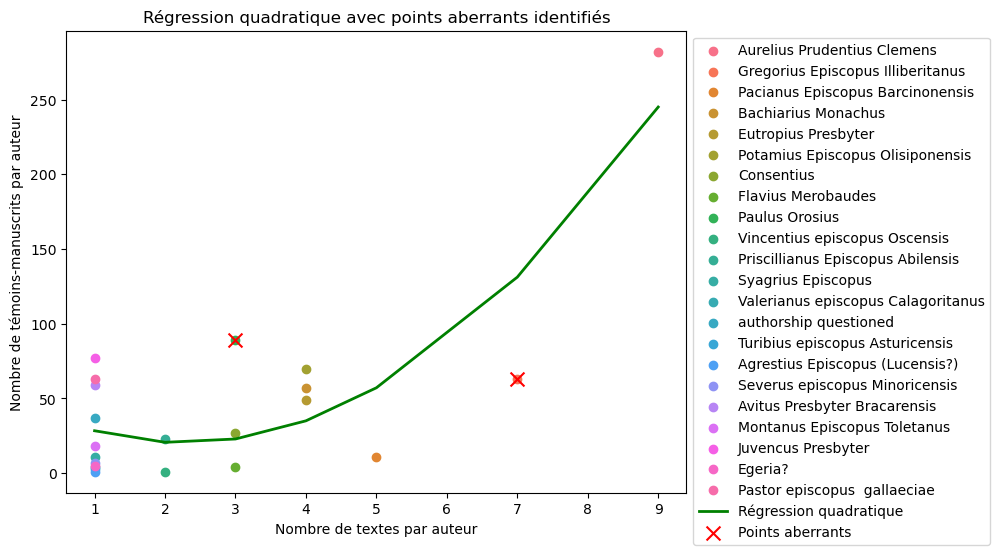

In [22]:
# On identifie les résidus
residuals_quad = y - y_pred_quad

# Je sélectionne les lignes dans le DataFrame data pour lesquelles les résidus du modèle de régression quadratique dépassent 1.5 fois l'écart type des résidus, ce qui est une indication de valeurs aberrantes.
outliers_quad = data[np.abs(residuals_quad) > 1.5 * np.std(residuals_quad)]

# Créer une nouvelle figure pour le graphique de régression quadratique avec cette fois-ci les points aberrants
plt.figure(figsize=(8, 6))
for i, row in data.iterrows():
    plt.scatter(row['text_count'], row['witness_count_unique'], color=colors[i], label=row['workAuthor'], marker='o')

plt.plot(X, y_pred_quad, color='green', linewidth=2, label='Régression quadratique')

plt.scatter(outliers_quad['text_count'], outliers_quad['witness_count_unique'], color='red', label='Points aberrants', marker='x', s=100)

plt.title('Régression quadratique avec points aberrants identifiés')
plt.xlabel('Nombre de textes par auteur')
plt.ylabel('Nombre de témoins-manuscrits par auteur')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

J'avais également fait ce code, bien qu'il n'apparaisse pas dans le Mémoire pour avoir une idée de la répartition du nombre de manuscrits par période et par genre.

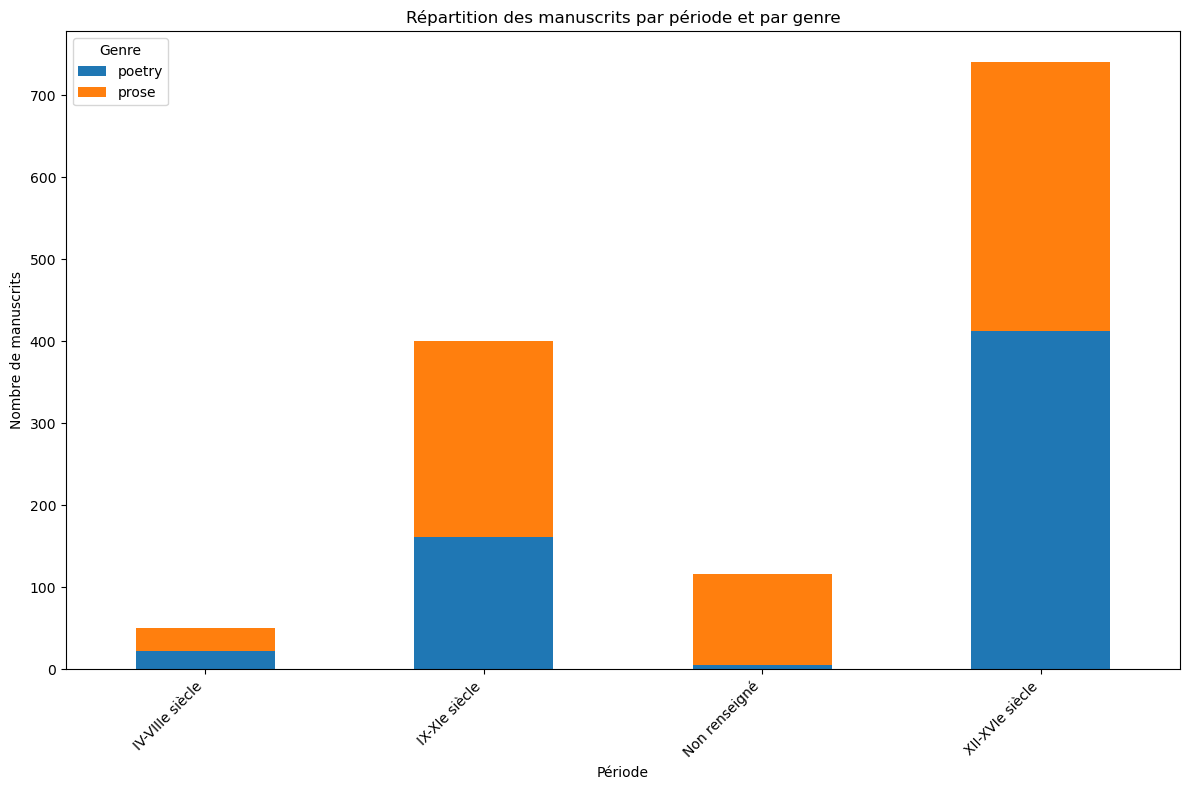

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("C:\\Users\\ADMIN\\Desktop\\Ecole_des_Chartes\\Memoire_2\\manuscripts_data_2\\manuscripts_data_vr\\wits_table4.xlsx")

# Je créé des catégories car mes siècles sont parfois par tranches et je dois bien indiquer dans quelle période je veux qu'ils soient mis.
categories = {
    'IV-VIIIe siècle': ['VIe siècle', 'VIIe siècle', 'VIIIe siècle','V-VIe siècle','VI-VIIe siècle','Ve-VIe siècle'],
    'IX-XIe siècle': ['IXe siècle', 'Xe siècle', 'XIe siècle', 'VIII-IXe siècle','X-XIe siècle', 'IX-Xe siècle', 'IX-XIe siècle', 'VIII-Xe siècle','VIII-XIe siècle'],
    'XII-XVIe siècle': ['XIIe siècle', 'XIIIe siècle', 'XIVe siècle', 'XVe siècle','XI-XVe  siècle', 'XI-XVe siècle','XII-XIIIe siècle', 'XIIIe-XIVe siècle','XIII-XVe siècle','XV-XVIe siècle','XIII-XIVe siècle','XIV-XVe siècle','XIIe-XIVe siècle','XI-XIIe siècle']
}

# Petite fonction pour leur attribuer automatiquement la période désignée ci-dessus
def assign_category(century):
    for category, periods in categories.items():
        if pd.isna(century):
            return "Non renseigné"  # Je n'oublie pas les manuscrits-artificiels ou d'autres manuscrits ou parfois le siècle n'est pas renseigné !
        elif century in periods:
            return category
    return "Non renseigné"  

# Mise en marche de la fonction
df['Catégorie'] = df['Century_witOrigDate'].apply(assign_category)

# Création d'une tableau qui croise les variables de genres et de période
pivot_table = pd.pivot_table(df, index='Catégorie', columns='workGeneralgenre', aggfunc='size', fill_value=0)

# Le graphique 
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Répartition des manuscrits par période et par genre')
plt.xlabel('Période')
plt.ylabel('Nombre de manuscrits')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()
